In [28]:
import pickle
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras import backend as K
%matplotlib notebook

In [7]:
def plot_2d_landmarks(img, true, pred):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(img.reshape((80,120,3)))
    ax.autoscale(False)
    ax.plot(pred[:,0], pred[:,1], '+w')
    plt.plot(true[:,0], true[:,1], '.r')
    ax.axis('off')
    plt.show()
    
def p_norm_loss(y_true, y_pred):
    return K.mean(K.pow(y_pred - y_true, 4), axis=-1)


In [8]:
landmark_dim = 2
# Load data
with open('all_data.pkl', 'rb') as f:
    images_train, images_test, ldmks_2d_train, ldmks_2d_test, ldmks_3d_train, ldmks_3d_test, head_pose_train, head_pose_test = pickle.load(f)

num_samples = images_test.shape[0]

In [9]:
# Load the saved model
# model = load_model('landmark_cnn.h5', custom_objects={'p_norm_loss': p_norm_loss})
# Load the saved model
model = load_model('landmark_cnn_v6_ploss_retarded.h5', custom_objects={'p_norm_loss': p_norm_loss}) # 4-norm

model2 = load_model('landmark_cnn_v5_mse_retarded_best.h5', custom_objects={'p_norm_loss': p_norm_loss}) # MSE

model3 = load_model('landmark_cnn_v7_mae_retarded.h5', custom_objects={'p_norm_loss': p_norm_loss}) # MAE

In [10]:
ldmks_2d_test = np.reshape(ldmks_2d_test, (num_samples, 28,landmark_dim))
ldmks_3d_test = np.reshape(ldmks_3d_test, (num_samples, 28,3))
head_pose_test_raw = np.reshape(head_pose_test, (num_samples, 3,3))

pred_landmarks = model.predict({'input_img': images_test, 'head_pose': head_pose_test})
pred_landmarks = np.reshape(pred_landmarks, (num_samples, 28,landmark_dim))

pred_landmarks_2 = model2.predict({'input_img': images_test, 'head_pose': head_pose_test})
pred_landmarks_2 = np.reshape(pred_landmarks_2, (num_samples, 28,landmark_dim))

pred_landmarks_3 = model3.predict({'input_img': images_test, 'head_pose': head_pose_test})
pred_landmarks_3 = np.reshape(pred_landmarks_3, (num_samples, 28,landmark_dim))

In [11]:
def get_projection_matrix(data_3d, data_2d):
    
    P, _, _, _ = np.linalg.lstsq(data_3d.astype(np.float32), data_2d.astype(np.float32))
    return P

<IPython.core.display.Javascript object>


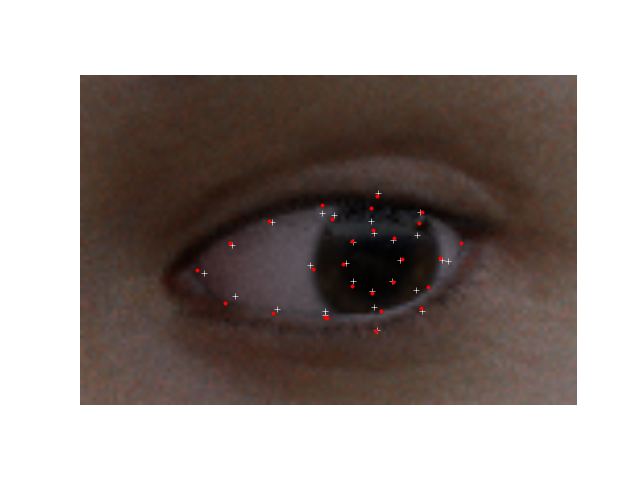

<IPython.core.display.Javascript object>


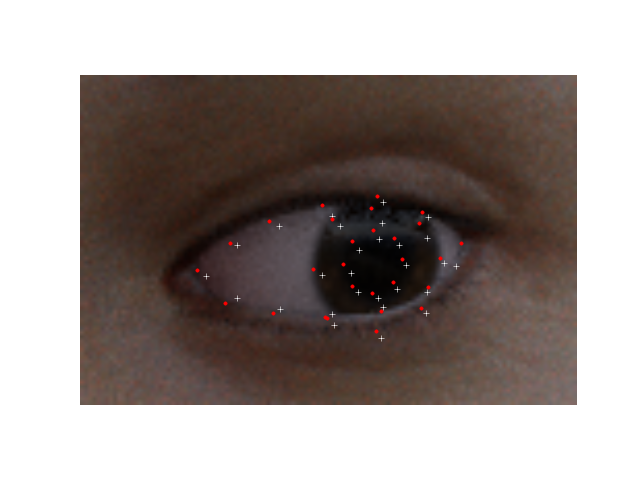

In [49]:
i = np.random.choice(num_samples)
plot_2d_landmarks(images_test[i,:,:,:], ldmks_2d_test[i,:,:], pred_landmarks_2[i,:,:])
plot_2d_landmarks(images_test[i,:,:,:], ldmks_2d_test[i,:,:], pred_landmarks_3[i,:,:])

<IPython.core.display.Javascript object>


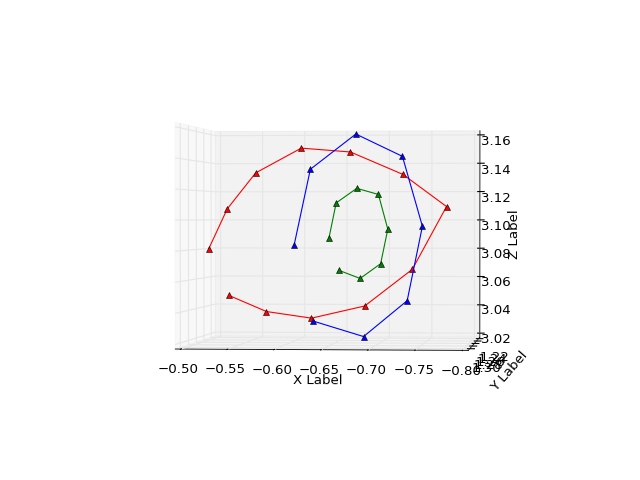

In [50]:
def plot_3d_landmarks(true, pred)

'''
==============
3D scatterplot
==============

Demonstration of a basic scatterplot in 3D.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


H = np.reshape(head_pose_test[i,:], (3,3))
Z = ldmks_3d_test[i,:,:].dot(H)

ax.plot(Z[:12,0], Z[:12,1], Z[:12,2], c='r', marker=m)
ax.plot(Z[12:20,0],Z[12:20,1], Z[12:20,2], c='b', marker=m)
ax.plot(Z[20:28,0],Z[20:28,1], Z[20:28,2], c='g', marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
